In [2]:
# Load modules
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

In [3]:
# 从CSV文件读取gama数据
gama_data = pd.read_csv('fossil_fuel.csv')  # 请将 'your_file.csv' 替换为你的文件路径

# 筛选1987年到2004年的数据
gama_data = gama_data[(gama_data['Year'] >= 1987) & (gama_data['Year'] <= 2004)]

# 确保CSV文件中包含了 'Year' 和 'gama' 两列
years = gama_data['Year']
gamas = gama_data['gama']/1000

# 初始化变量用于存储结果
calculation_without_buffer = []

# 初始条件
N1 = 740  # 大气中的碳浓度
N2 = 900  # 海洋表面的碳浓度
k12 = 105 / 740  # 大气到海洋的转移系数
k21 = 102 / 900  # 海洋到大气的转移系数

# 模拟计算1987年到2004年的碳浓度变化
for i in range(len(years)):
    year = years.iloc[i]
    gama = gamas.iloc[i]

    dN1_dt = -k12 * N1 + k21 * N2 + gama
    dN2_dt = k12 * N1 - k21 * N2
    
    # 使用欧拉方法进行数值积分
    dt = 1  # 时间步长为1年
    N1 += dN1_dt * dt
    N2 += dN2_dt * dt

 # 存储每年的结果，将单位转换为ppm并保存在列表中
    calculation_without_buffer.append(N1 / 2.13)

    # 输出每年的结果，并将单位转换为ppm
    print(f"年份: {year}, 大气中二氧化碳水平: {N1 / 2.13:.2f} ppm")

年份: 1987, 大气中二氧化碳水平: 348.71 ppm
年份: 1988, 大气中二氧化碳水平: 350.08 ppm
年份: 1989, 大气中二氧化碳水平: 351.47 ppm
年份: 1990, 大气中二氧化碳水平: 352.87 ppm
年份: 1991, 大气中二氧化碳水平: 354.27 ppm
年份: 1992, 大气中二氧化碳水平: 355.62 ppm
年份: 1993, 大气中二氧化碳水平: 356.95 ppm
年份: 1994, 大气中二氧化碳水平: 358.32 ppm
年份: 1995, 大气中二氧化碳水平: 359.75 ppm
年份: 1996, 大气中二氧化碳水平: 361.21 ppm
年份: 1997, 大气中二氧化碳水平: 362.70 ppm
年份: 1998, 大气中二氧化碳水平: 364.15 ppm
年份: 1999, 大气中二氧化碳水平: 365.56 ppm
年份: 2000, 大气中二氧化碳水平: 367.03 ppm
年份: 2001, 大气中二氧化碳水平: 368.57 ppm
年份: 2002, 大气中二氧化碳水平: 370.12 ppm
年份: 2003, 大气中二氧化碳水平: 371.83 ppm
年份: 2004, 大气中二氧化碳水平: 373.69 ppm


In [9]:
# 从CSV文件读取gama数据
gama_data = pd.read_csv('fossil_fuel.csv')  # 请将 'your_file.csv' 替换为你的文件路径

# 筛选1987年到2004年的数据
gama_data = gama_data[(gama_data['Year'] >= 1987) & (gama_data['Year'] <= 2004)]

# 确保CSV文件中包含了 'Year' 和 'gama' 两列
years = gama_data['Year']
gamas = gama_data['gama'] / 1000

# 初始化变量用于存储结果
calculation_with_buffer = []

# 初始条件
N1 = 740  # 大气中的碳浓度
N2 = 900  # 海洋表面的碳浓度
k12 = 105 / 740  # 大气到海洋的转移系数
k21 = 102 / 900  # 海洋到大气的转移系数
N20 = 821  # 海洋表层碳的平衡值

# 模拟计算1987年到2004年的碳浓度变化
for i in range(len(years)):
    year = years.iloc[i]
    gama = gamas.iloc[i]
    z = N1 / 2.13  # 以ppm为单位的大气二氧化碳浓度

    # 计算缓冲系数 xi
    xi = 3.69 + 1.86 * 10**(-2) * z - 1.80 * 10**(-6) * z**2

    dN1_dt = -k12 * N1 + k21 * (N20 + xi * (N2 - N20)) + gama
    dN2_dt = k12 * N1 - k21 * (N20 + xi * (N2 - N20))

    # 使用欧拉方法进行数值积分
    dt = 1  # 时间步长为1年
    N1 += dN1_dt * dt
    N2 += dN2_dt * dt

 # 存储每年的结果，将单位转换为ppm并保存在列表中
    calculation_with_buffer.append(N1 / 2.13)

    # 输出每年的结果，并将单位转换为ppm
    print(f"年份: {year}, 大气中二氧化碳水平: {N1 / 2.13:.2f} ppm")

年份: 1987, 大气中二氧化碳水平: 386.27 ppm
年份: 1988, 大气中二氧化碳水平: 379.08 ppm
年份: 1989, 大气中二氧化碳水平: 384.82 ppm
年份: 1990, 大气中二氧化碳水平: 386.44 ppm
年份: 1991, 大气中二氧化碳水平: 389.42 ppm
年份: 1992, 大气中二氧化碳水平: 391.94 ppm
年份: 1993, 大气中二氧化碳水平: 394.61 ppm
年份: 1994, 大气中二氧化碳水平: 397.28 ppm
年份: 1995, 大气中二氧化碳水平: 400.03 ppm
年份: 1996, 大气中二氧化碳水平: 402.83 ppm
年份: 1997, 大气中二氧化碳水平: 405.68 ppm
年份: 1998, 大气中二氧化碳水平: 408.52 ppm
年份: 1999, 大气中二氧化碳水平: 411.34 ppm
年份: 2000, 大气中二氧化碳水平: 414.24 ppm
年份: 2001, 大气中二氧化碳水平: 417.21 ppm
年份: 2002, 大气中二氧化碳水平: 420.20 ppm
年份: 2003, 大气中二氧化碳水平: 423.40 ppm
年份: 2004, 大气中二氧化碳水平: 426.75 ppm


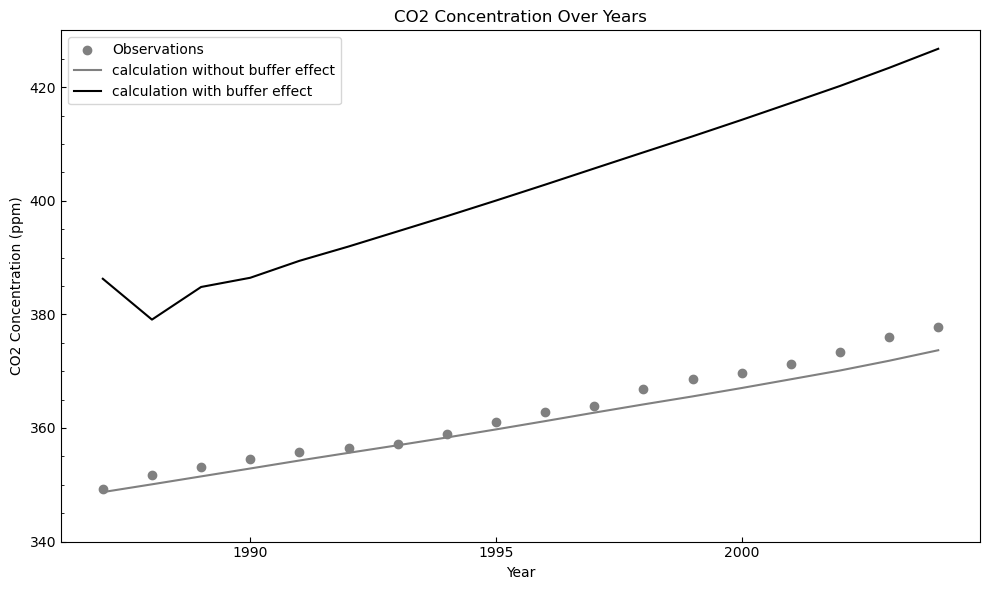

In [10]:
# 读取数据
data = pd.read_csv('observations.csv')

# 筛选1987年到2004年的数据
filtered_data = data[(data['year'] >= 1987) & (data['year'] <= 2004)]

# 获取筛选后的年份和二氧化碳浓度数据
years = filtered_data['year']
observations = filtered_data['mean']

# 绘制图表
plt.figure(figsize=(10, 6))

# 绘制观测点数据的灰色散点图
plt.scatter(years, observations, color='grey', label='Observations')

# 绘制 calculation_without_buffer
plt.plot(years, calculation_without_buffer, color='grey', linestyle='-', label='calculation without buffer effect')

# 绘制 calculation_with_buffer
plt.plot(years, calculation_with_buffer, color='black', linestyle='-', label='calculation with buffer effect')

# 设置y轴范围和刻度显示
plt.ylim(340, 430)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(20))  # 设置大刻度间隔为20
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(5))  # 设置小刻度间隔为5

# 设置横坐标刻度显示
plt.gca().xaxis.set_major_locator(ticker.FixedLocator([1985, 1990, 1995, 2000]))

# 设置刻度朝内
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in', which='both')

# 设置图表标签和标题
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('CO2 Concentration Over Years')

# 添加图例
plt.legend()

# 取消网格
plt.grid(False)

# 显示图表
plt.tight_layout()
plt.show()

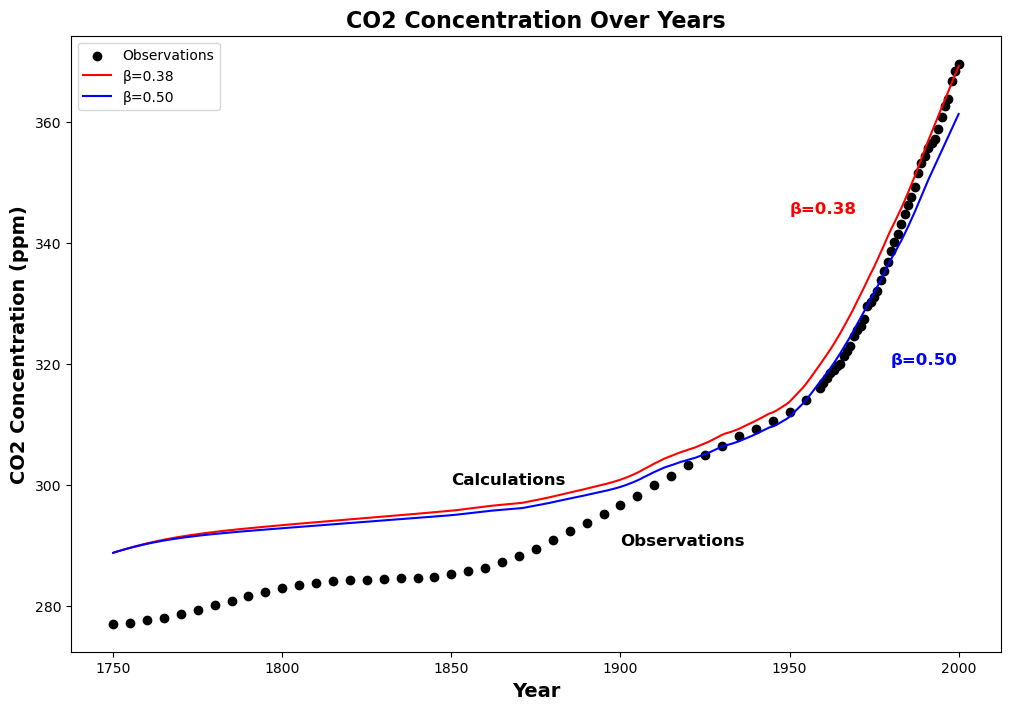

In [6]:
# 读取数据
co2_observations = pd.read_csv('Observations_1750_20000.csv')
land_use_data = pd.read_excel('land-use_1750_2005.xls')
fossil_emissions = pd.read_csv('global_1751_2016.csv')

# 数据预处理
land_use_data = land_use_data[['Year', 'Global']]
land_use_data['LandUseChange'] = land_use_data['Global'] / (1000 * 2.13)

fossil_emissions = fossil_emissions[['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)', 'Carbon emissions from cement production']]
fossil_emissions['FossilFuelEmissions'] = fossil_emissions.iloc[:, 1] - fossil_emissions.iloc[:, 2]
fossil_emissions['EmissionFactor'] = fossil_emissions['FossilFuelEmissions'] / (1000 * 2.13)

# 参数定义
k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71 = [60 / 615, 60 / 842, 9 / 842, 43 / 842, 52 / 9744, 162 / 9744, 205 / 26280, 0.2 / 26280, 0.2 / 90000000, 62 / 731, 62 / 1238]
N2_0 = 842 / 2.13

# 初始化
initial_conditions = [615 / 2.13, 842 / 2.13, 9744 / 2.13, 26280 / 2.13, 90000000 / 2.13, 731 / 2.13, 1238 / 2.13]
f0 = 62 / 2.13
P0 = 615 / 2.13

# 探索的Beta值
beta_values = [0.38, 0.5]
results = []

for beta in beta_values:
    # 使用初始条件初始化各个部分
    N1, N2, N3, N4, N5, N6, N7 = initial_conditions.copy()
    atmosphere = [N1]
    
    for year in range(1751, 2001):
        # 获取gamma和delta值
        gamma = fossil_emissions[fossil_emissions['Year'] == year]['EmissionFactor'].values[0]
        delta = land_use_data[land_use_data['Year'] == year]['LandUseChange'].values[0]

        # 计算xi值
        xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1**2

        # 更新f值
        f = f0 * (1 + beta * np.log(N1 / P0))
        
        # 计算各个部分的变化率
        dN1_dt = -k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7
        dN2_dt = k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0)) - k23 * N2 + k32 * N3 - k24 * N2
        dN3_dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
        dN4_dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
        dN5_dt = k45 * N4 - k51 * N5
        dN6_dt = f - k67 * N6 - 2 * delta
        dN7_dt = k67 * N6 - k71 * N7 + delta

        # 更新各个部分的值
        N1 += dN1_dt
        N2 += dN2_dt
        N3 += dN3_dt
        N4 += dN4_dt
        N5 += dN5_dt
        N6 += dN6_dt
        N7 += dN7_dt

        atmosphere.append(N1)

    results.append(atmosphere)


# 创建图表并设定大小
plt.figure(figsize=(12, 8))

# 绘制观测数据的散点图，颜色设置为黑色
plt.scatter(co2_observations['year'], co2_observations['mean'], label='Observations', color='black')

# 添加文本标注
plt.text(1850, 300, 'Calculations', fontsize=12, fontweight='bold')
plt.text(1900, 290, 'Observations', fontsize=12, fontweight='bold')
plt.text(1950, 345, 'β=0.38', fontsize=12, fontweight='bold', color='red')
plt.text(1980, 320, 'β=0.50', fontsize=12, fontweight='bold', color='blue')

# 直接绘制每个β值的结果，颜色分别为红色和蓝色
plt.plot(range(1750, 2001), results[0], color='red', label='β=0.38')
plt.plot(range(1750, 2001), results[1], color='blue', label='β=0.50')


# 设置图表标签和标题
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('CO2 Concentration (ppm)', fontsize=14, fontweight='bold')
plt.title('CO2 Concentration Over Years', fontsize=16, fontweight='bold')

# 显示图例
plt.legend()

# 显示图表
plt.show()
